# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return x ** .5 - np.cos(x) 
def phi(x, alpha):
    return x - alpha * f(x)

In [3]:
def df(x):
    return .5 * x ** (-.5) + np.sin(x) 

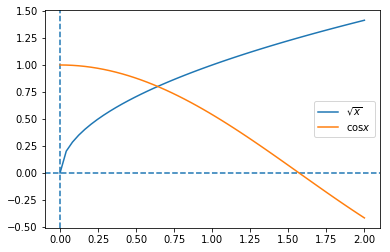

In [4]:
#Plot the left-hand side and right-hand side of this equation, and localize the root graphically. 
#Estimate the location of the root by visual inspection of the plot.
xx=np.linspace(0, 2)
plt.axhline(0,ls='--')
plt.axvline(0,ls='--')
plt.plot(xx, xx ** .5, label=r'$\sqrt{x}$')
plt.plot(xx, np.cos(xx), label=r'$\cos{x}$')
plt.legend()

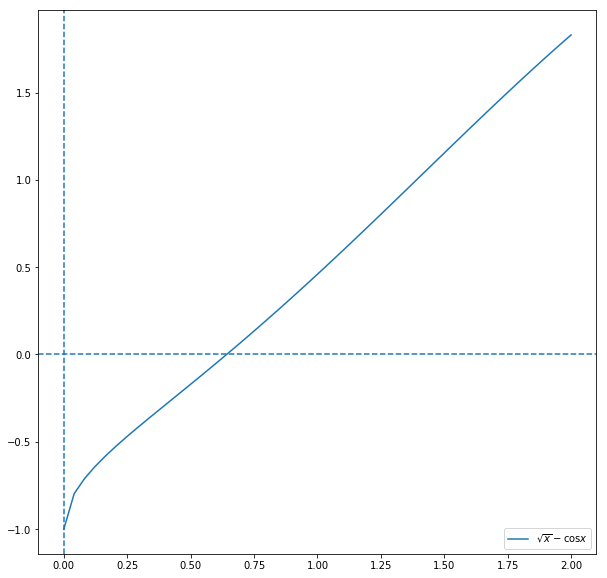

In [5]:
plt.subplots(figsize=(10,10))
plt.axhline(0,ls='--')
plt.axvline(0,ls='--')
plt.plot(xx, xx ** .5  - np.cos(xx), label=r'$\sqrt{x}-\cos{x}$')
plt.legend()

$0.3<x*<1$

In [6]:
a = 0.5
b = 0.75

In [7]:
x_loc = np.linspace(a, b, 400)
M=np.max(df(x_loc))
m=np.min(df(x_loc))

M,m

(1.2589890292129597, 1.1865323197907505)

#### Метод простой итерации
Идея - привести $f(x)$ к виду $x=\phi(x)$. Иными словами, задача сведётся к поиску точки пересечения $y=\phi(x)$ и биссектрисы $y=x$, т.е. решения уравнения $x=\phi(x)$. Тогда итерационный процесс: $x_k=\phi(x_{k-1})$.

Чтобы метод сходился, необходимо и достаточно, чтобы на отрезке локализации угол наклона $\phi(x)$ к оси абсцисс был меньше, чем у биссектрисы, т.е. $|\phi'(x)\le q<1|$

Метод сходится со скоростью геометрической прогрессии: $|x_n-x|\le q^n|x_0-x|$

Критерий окончания: $|x_n-x_{n-1}|<\frac{1-q}{q}\cdot \varepsilon$

Пусть $q=\frac{M-m}{M+m}$.

In [8]:
q=1

In [9]:
def simple_it(phi, alpha, a, b, eps):
    xn=(a+b)/2
    xnp=xn
    k=0
    while True:
        xn=xnp
        xnp=phi(xn, alpha)
        k+=1
        if np.abs(xnp-xn)<eps:
            break
    print(k, 'шагов')
    print('корень: ', xnp)
    return xnp

In [10]:
for eps in (0.001, 0.0001, 0.00001):
    print('_____epsilon =', eps, '_____')
    for alpha in (.1, .5, 1, 1.5):
        print('alpha =', alpha)
        simple_it(phi, alpha, a, b, eps)

_____epsilon = 0.001 _____
alpha = 0.1
7 шагов
корень:  0.6349964074472243
alpha = 0.5
4 шагов
корень:  0.6413310338540051
alpha = 1
4 шагов
корень:  0.641673626839413
alpha = 1.5
20 шагов
корень:  0.6412713640225105
_____epsilon = 0.0001 _____
alpha = 0.1
25 шагов
корень:  0.6410715495194786
alpha = 0.5
6 шагов
корень:  0.6416564671288164
alpha = 1
5 шагов
корень:  0.6417234457027863
alpha = 1.5
33 шагов
корень:  0.6417562717106106
_____epsilon = 1e-05 _____
alpha = 0.1
42 шагов
корень:  0.6416443489569813
alpha = 0.5
9 шагов
корень:  0.641710972014139
alpha = 1
7 шагов
корень:  0.6417148210823355
alpha = 1.5
46 шагов
корень:  0.6417104074490595


In [11]:
alpha = 2/(m + M)
for eps in (0.001, 0.0001, 0.00001):
    print('_____epsilon =', eps, '_____')
    simple_it(phi, alpha, a, b, 0.001)

_____epsilon = 0.001 _____
2 шагов
корень:  0.6417143699289065
_____epsilon = 0.0001 _____
2 шагов
корень:  0.6417143699289065
_____epsilon = 1e-05 _____
2 шагов
корень:  0.6417143699289065


увеличение точности увеличивает число шагов, что логично. Наименьшее число шагов достигается при $\alpha$, близком к оптимальному.

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [12]:
x = simple_it(phi, 1, a, b, 0.001)
np.set_printoptions(precision = 3)
print(np.array([x]))

4 шагов
корень:  0.641673626839413
[0.642]


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

Используем формулу для нахождения интерполяционного многочлена Лагранжа ($n=2$):

<img src='2_1.png'></img>

где $l_i$ в общем случае определяется как

<img src='2_2.png'></img>

Так как мы имеем дело с обратной интерполяцией, то все $x$ и $y$ меняются местами.

Произведя соттветствующие замены, имеем такую формулу. Здесь $n$ отвечает уже не за порядок многочлена, а за номер шага алгоритма!

<img src='2_3.png'></img>

Так как мы определяем $x_{n+1}$ как значение функции $f^{-1}(y)$ при $y=0$, то

<img src='2_4.png'></img>

In [13]:
def inv_quad_interpolation(func, x0, x1, x2, eps):
    k = 0
    while True:
        k +=1
        f0=func(x0)
        f1=func(x1)
        f2=func(x2)
        xnp = f1*f2/((f0-f1)*(f0-f2))*x0 + f0*f2/((f1-f0)*(f1-f2))*x1 + f0*f1/((f2-f0)*(f2-f1))*x2
        if abs(xnp - x2) < eps:
            break
        x0, x1, x2 = x1, x2, xnp
    print(k, 'шагов')
    print('корень: ', xnp)
    return xnp

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

Первые приближения находятся внутри отрезка локализации - точность должна быть высокой.

In [14]:
def f(x):
    return x-1/np.tan(x)

In [15]:
inv_quad_interpolation(f, 0.6, 0.8, 1, 0.001)

2 шагов
корень:  0.8603335422385415


0.8603335422385415

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).

In [16]:
def y(x):
    return x**3-1

In [17]:
def dy(x):
    return 3*x**2

In [18]:
def xn(x):
    return x-y(x)/dy(x)

In [19]:
roots=np.zeros(3, dtype=complex)
roots[0]=1
roots[1]=- (-1)**(2/3)
roots[2]=(-1)**(2/3)

In [20]:
#мы говорим, что корень, найденный по методу Ньютона относится к какому-либо точному корню, 
#если расстояние между вещественными/комплексными частями меньше eps
eps=0.01

In [21]:
m=100
def which_root(x):
    for i in range(m):
        x=xn(x)
    if abs(x.real-roots[0].real)<eps:
        return 0
    if abs(x.imag-roots[1].imag)<eps:
        return 1
    if abs(x.imag-roots[2].imag)<eps:
        return 2
    return -1

In [22]:
n=100
a=np.linspace(-50,50,n)
b=np.linspace(-50,50,n)
grid=np.zeros(n*n,dtype=complex)
for i in range(n):
    for j in range(n):
        grid[n*i+j]=complex(a[i],b[j])

In [23]:
which_grid=np.zeros(n*n,dtype=int)
for i in range(n):
    for j in range(n):
        which_grid[n*i+j]=which_root(grid[n*i+j])

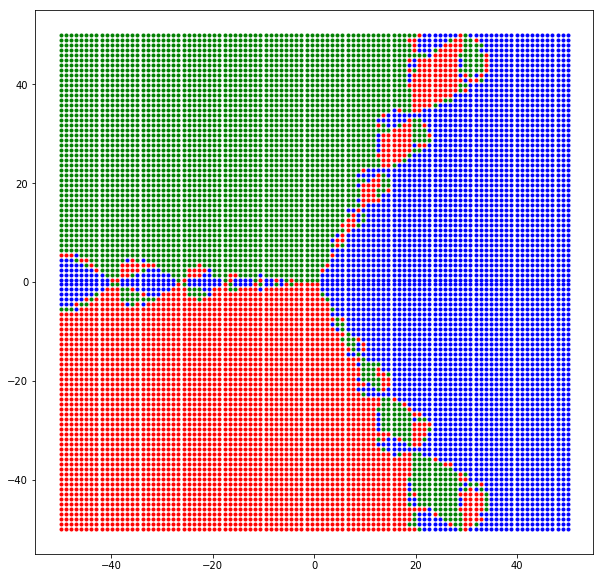

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
for i in range(n*n):
    if which_grid[i]==0:
        ax.plot(grid.real[i],grid.imag[i], '.',c='blue')
    if which_grid[i]==1:
        ax.plot(grid.real[i],grid.imag[i], '.',c='red')
    if which_grid[i]==2:
        ax.plot(grid.real[i],grid.imag[i], '.',c='green')

Разным цветам соответствуют значения $z$, относящиеся к разным корням. Пересечения областей образуют фракталы. Чем больше значений просмотрено, тем больше становится глубина самоподобных фигур. 